Возьмите базу трафика с сайта компании traff.csv. Напишите
модель для прогнозирования трафика. Возьмите xLen = 60
Добейтесь максимально точного соответствия между графиками
корреляции исходного сигнала и прогноза.

In [136]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

%matplotlib inline

In [137]:
url='https://drive.google.com/uc?id=1A1yUoUgtuYa_71-MJO50z4YVymYZxien'

In [138]:
data = pd.read_csv(url, header=None)

In [139]:
data

,0,1
0,1/1/2017,"22,226.00"
1,1/2/2017,"29,593.00"
2,1/3/2017,"31,726.00"
3,1/4/2017,"32,684.00"
4,1/5/2017,"31,820.00"
...,...,...
1090,12/27/2019,"29,801.00"
1091,12/28/2019,"34,913.00"
1092,12/29/2019,"37,665.00"
1093,12/30/2019,"32,643.00"


In [140]:
data[1] = list(map(lambda x: float(x.replace(',','')), data[1]))

xLen = 60
valLen = 300
batch_size = 20

trainLen = data.shape[0]-valLen

xTrain, xTest = data[:trainLen], data[trainLen+xLen+2:]

xScaler = MinMaxScaler()
xScaler.fit(xTrain[1].values.reshape((-1, 1)))
xTrain = xScaler.transform(xTrain[1].values.reshape((-1, 1)))
xTest = xScaler.transform(xTest[1].values.reshape((-1, 1)))

trainDataGen = TimeseriesGenerator(xTrain, xTrain,
                               length=xLen, sampling_rate=1,
                               batch_size=batch_size,stride = 1)

testDataGen = TimeseriesGenerator(xTest, xTest,
                               length=xLen, sampling_rate=1,
                               batch_size=batch_size,stride = 1)

Epoch 1/100
37/37 [==============================] - 7s 58ms/step - loss: 0.0776 - val_loss: 0.0657
Epoch 2/100
37/37 [==============================] - 1s 14ms/step - loss: 0.0434 - val_loss: 0.0428
Epoch 3/100
37/37 [==============================] - 1s 13ms/step - loss: 0.0164 - val_loss: 0.0132
Epoch 4/100
37/37 [==============================] - 0s 13ms/step - loss: 0.0156 - val_loss: 0.0479
Epoch 5/100
37/37 [==============================] - 1s 16ms/step - loss: 0.0109 - val_loss: 0.0145
Epoch 6/100
37/37 [==============================] - 1s 18ms/step - loss: 0.0099 - val_loss: 0.0117
Epoch 7/100
37/37 [==============================] - 1s 17ms/step - loss: 0.0100 - val_loss: 0.0165
Epoch 8/100
37/37 [==============================] - 1s 18ms/step - loss: 0.0113 - val_loss: 0.0123
Epoch 9/100
37/37 [==============================] - 1s 19ms/step - loss: 0.0090 - val_loss: 0.0108
Epoch 10/100
37/37 [==============================] - 1s 14ms/step - loss: 0.0109 - val_loss: 0.0180

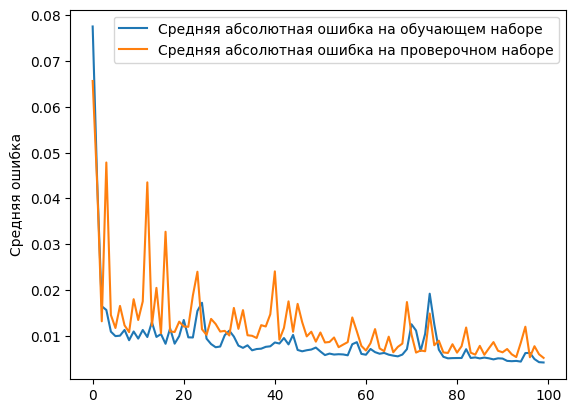

In [141]:
model = Sequential()
model.add(LSTM(100,input_shape=(xLen, 1), return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(Flatten())
model.add(Dense(100, activation='linear'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(
                    trainDataGen,
                    epochs=100,
                    verbose=1,
                    validation_data = testDataGen
                    )

plt.plot(history.history['loss'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

9/9 [==============================] - 1s 5ms/step


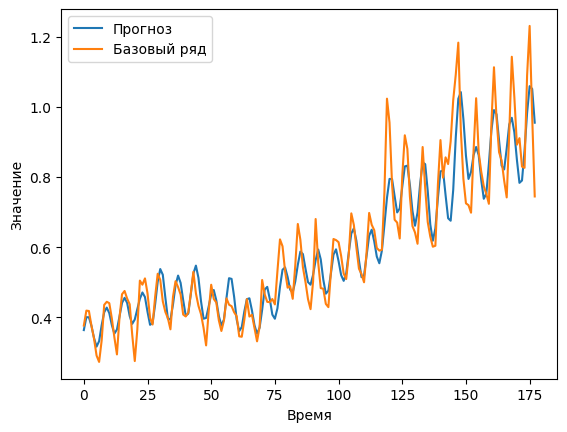

In [142]:
pred = model.predict(testDataGen)
plt.plot(pred , label='Прогноз')
plt.plot(xTest[xLen:], label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()